In [70]:
# import pandas
import pandas as pd

In [87]:
# read in the data
gdp = pd.read_csv('data/gdp_cleaned.csv')
pop = pd.read_csv('data/world_population.csv')

In [72]:
# get all the countries to a list
countries = gdp['country_code'].unique()

# GDP and Economic Growth
We calculate the gdp growth rate from 1960 to 2020 for each country and plot the top 10 countries with the highest gdp growth rate.

In [73]:
# we subset the data for years 1960 and 2020
gdp_1960 = gdp[gdp['year'] == 1960]
gdp_2020 = gdp[gdp['year'] == 2020]

# since the shapes of the dataframes are different, we merge them
gdp_1960_2020 = pd.merge(gdp_1960, gdp_2020, on=['country_name','country_code'], \
    how='inner', suffixes=('_1960', '_2020')).drop(['year_1960', 'year_2020'], axis=1)

In [74]:
# now we calculate the growth rate and add it to the dataframe as a new column
gdp_1960_2020['growth_rate'] = (gdp_1960_2020['value_2020'] - gdp_1960_2020['value_1960']) / gdp_1960_2020['value_1960']

In [75]:
# Pick the first 10 countries with the highest growth rate
gdp_10 = gdp_1960_2020.sort_values(by='growth_rate', ascending=False)[:10]

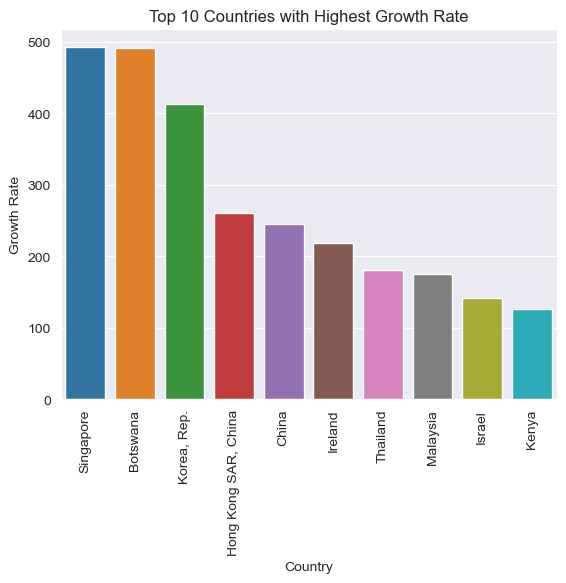

In [109]:
# plot a bar chart of the growth rate of the countries with the highest growth rate
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='country_name', y='growth_rate', data=gdp_10)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Growth Rate')
plt.title('Top 10 Countries with Highest Growth Rate')
plt.show()

# USA Economy compared to other countries
Now we draw a line plot to show GDP of USA, UK, China, India, Japan and Germany from 1960 to 2020.

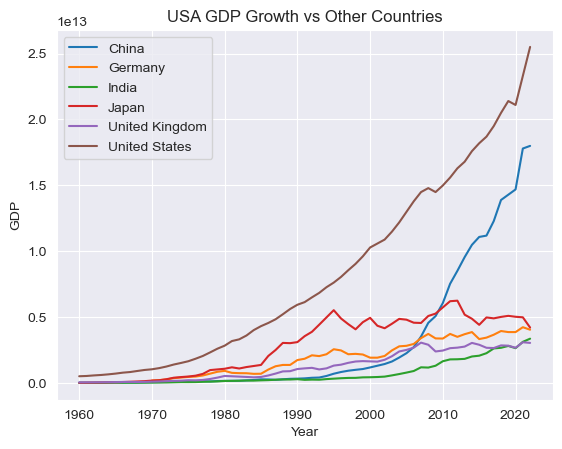

In [106]:
# plot a line chart of the gdp vs year for USA, UK, China, India, Japan, and Germany after 2010
countries = ['United States', 'United Kingdom', 'China', 'India', 'Japan', 'Germany']
gdp_usa_vs_others = gdp[gdp['country_name'].isin(countries)]

sns.set_style('darkgrid')
sns.lineplot(x='year', y='value', data=gdp_usa_vs_others, hue='country_name')
plt.legend()
plt.xlabel('Year')
plt.ylabel('GDP')
#plt.xlim(2000,)
plt.title('USA GDP Growth vs Other Countries')
plt.show()

# GDP per Capita

Now we calculate GDP per Capita for each country. We use the pop dataframe to get the population of each country years 2022, 2020, 2015, 2010, 2000, 1990, 1980, 1970. Then we divide the GDP by the population to get the GDP per Capita.

In [91]:
years = [2022, 2020, 2015, 2010, 2000, 1990, 1980, 1970]

# we subset the gdp dataframe to only include the years in the years list
gdp_years = gdp[gdp['year'].isin(years)]

In [101]:
# we use melt to convert the columns into rows
population = pop.melt(id_vars=['Country/Territory', 'CCA3'], \
    value_vars=['1970 Population', '1980 Population', '1990 Population', '2000 Population', \
        '2010 Population', '2015 Population', '2020 Population', '2022 Population'], var_name='pop_year', value_name='population')

# we rename the columns to match the gdp_years dataframe
population['year'] = population['pop_year'].str[:4].astype(int)
population = population.drop('pop_year', axis=1)

# we merge the two dataframes
gdp_pop = pd.merge(gdp_years, population, left_on=['country_code', 'year'], right_on=['CCA3', 'year'], how='inner')\
    .drop(['CCA3', 'Country/Territory'], axis=1)

In [103]:
# now we calculate the gdp per capita
gdp_pop['gdp_per_capita'] = gdp_pop['value'] / gdp_pop['population']

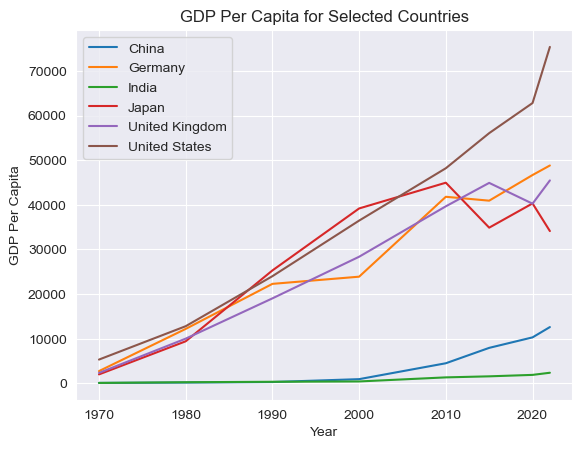

In [107]:
# now we draw a line chart of the gdp per capita for the countries in the countries list
countries = ['United States', 'United Kingdom', 'China', 'India', 'Japan', 'Germany']
gdp_pop_countries = gdp_pop[gdp_pop['country_name'].isin(countries)]

# we use seaborn to draw the line chart
sns.set_style('darkgrid')
sns.lineplot(x='year', y='gdp_per_capita', data=gdp_pop_countries, hue='country_name')
plt.legend()
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita for Selected Countries')
plt.show()

As we can see from the plot, the GDP per Capita of USA is much higher than other countries. Eventhough China has a higher GDP than Japan, the GDP per Capita of Japan is higher than China.